In [1]:
import a2
import pandas as pd
CAMINHO = "paralisiainfantil.csv"

In [2]:
a2.questao_1(CAMINHO)

475

In [3]:
a2.questao_2(CAMINHO)

261160    62
355030    28
211130    21
130260    20
250750    18
          ..
430460     1
170255     1
421580     1
353080     1
171880     1
Name: ID_MUNICIP, Length: 120, dtype: int64

In [4]:
a2.questao_3(CAMINHO)

('M', {'M': 271, 'F': 204})

In [5]:
a2.questao_4(CAMINHO)

6.441403508771931

In [6]:
a2.questao_5(CAMINHO)

{'SP': 76,
 'PE': 62,
 'PR': 41,
 'MG': 40,
 'BA': 35,
 'RS': 26,
 'MA': 22,
 'RJ': 21,
 'AM': 20,
 'PB': 18,
 'AL': 13,
 'RN': 12,
 'PA': 11,
 'PI': 11,
 'GO': 10,
 'TO': 9,
 'SE': 9,
 'DF': 8,
 'RO': 5,
 'MS': 5,
 'MT': 4,
 'CE': 4,
 'ES': 4,
 'AC': 3,
 'SC': 3,
 'AP': 3}

In [7]:
a2.questao_6(CAMINHO)

{'SP': 43,
 'PE': 34,
 'BA': 27,
 'PR': 27,
 'MG': 19,
 'RS': 18,
 'RJ': 12,
 'PB': 11,
 'AM': 9,
 'MA': 9,
 'AL': 8,
 'PI': 8,
 'TO': 6,
 'SE': 6,
 'DF': 5,
 'RN': 5,
 'GO': 4,
 'PA': 4,
 'CE': 4,
 'RO': 3,
 'MS': 3,
 'AC': 2,
 'MT': 2,
 'SC': 1,
 'AP': 1}

In [8]:
a2.questao_7(CAMINHO)

{'AC': 0.09090909090909091,
 'AL': 0.0196078431372549,
 'AP': 0.0625,
 'AM': 0.016129032258064516,
 'BA': 0.016786570743405275,
 'CE': 0.005434782608695652,
 'DF': 1.0,
 'ES': 0.038461538461538464,
 'GO': 0.008130081300813009,
 'MA': 0.009216589861751152,
 'MT': 0.014184397163120567,
 'MS': 0.02531645569620253,
 'MG': 0.017584994138335287,
 'PA': 0.034722222222222224,
 'PB': 0.004484304932735426,
 'PR': 0.047619047619047616,
 'PE': 0.005405405405405406,
 'PI': 0.004464285714285714,
 'RN': 0.011976047904191617,
 'RS': 0.018108651911468814,
 'RJ': 0.04395604395604396,
 'RO': 0.019230769230769232,
 'RR': 0.0,
 'SC': 0.010169491525423728,
 'SP': 0.043410852713178294,
 'SE': 0.013333333333333334,
 'TO': 0.02877697841726619}

In [9]:
a2.questao_8(CAMINHO)

/home/pedro/Modelos/Python/Aulas IC/Projeto-A2-IC/Descrição/a2.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["DT_NOTIFICACAO"] = pd.to_datetime(df["DT_NOTIFIC"])
/home/pedro/Modelos/Python/Aulas IC/Projeto-A2-IC/Descrição/a2.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["DT_SINTOMAS"] = pd.to_datetime(df["DT_SIN_PRI"])
/home/pedro/Modelos/Python/Aulas IC/Projeto-A2-IC/Descrição/a2.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

,DT_NOTIFICACAO,DT_SINTOMAS,ATRASO_NOT
0,2015-01-05,2015-01-03,2
1,2015-01-06,2015-01-05,1
2,2015-01-06,2015-01-01,5
3,2015-01-12,2015-01-06,6
4,2015-01-12,2015-01-10,2
...,...,...,...
470,2016-01-29,2015-12-24,36
471,2016-02-01,2015-12-31,32
472,2016-02-03,2015-12-11,54
473,2016-02-18,2015-12-06,74


In [10]:
a2.questao_9(CAMINHO)

/home/pedro/Modelos/Python/Aulas IC/Projeto-A2-IC/Descrição/a2.py:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["DT_NOTIFICACAO"] = pd.to_datetime(df["DT_NOTIFIC"])
/home/pedro/Modelos/Python/Aulas IC/Projeto-A2-IC/Descrição/a2.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["DT_SINTOMAS"] = pd.to_datetime(df["DT_SIN_PRI"])
/home/pedro/Modelos/Python/Aulas IC/Projeto-A2-IC/Descrição/a2.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

{'AC': (3.0, 0.0),
 'AL': (9.153846153846153, 5.610201331000428),
 'AP': (26.0, 16.522711641858304),
 'AM': (8.1, 8.64443843112285),
 'BA': (8.457142857142857, 7.901388028258658),
 'CE': (8.0, 9.018499505645789),
 'DF': (5.75, 6.341473465550866),
 'ES': (6.5, 4.79583152331272),
 'GO': (7.5, 10.51189802081432),
 'MA': (13.5, 15.045170084021745),
 'MT': (18.25, 10.812801055539063),
 'MS': (4.4, 1.6733200530681511),
 'MG': (15.9, 28.870000399669607),
 'PA': (14.363636363636363, 16.70492578416754),
 'PB': (4.666666666666667, 3.9556363361069242),
 'PR': (13.170731707317072, 25.040869033466464),
 'PE': (17.693548387096776, 50.74674784368685),
 'PI': (11.454545454545455, 9.363371576132566),
 'RN': (5.333333333333333, 3.3933982252531925),
 'RS': (39.42307692307692, 56.28866534351162),
 'RJ': (42.904761904761905, 54.265002314479595),
 'RO': (3.6, 2.3021728866442674),
 'RR': (0, 0),
 'SC': (8.0, 11.357816691600547),
 'SP': (19.42105263157895, 30.028547820541146),
 'SE': (6.333333333333333, 5.049

/home/pedro/Modelos/Python/Aulas IC/Projeto-A2-IC/Descrição/a2.py:106: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["DT_NOTIFICACAO"] = pd.to_datetime(df["DT_NOTIFIC"])
/home/pedro/Modelos/Python/Aulas IC/Projeto-A2-IC/Descrição/a2.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["DT_SINTOMAS"] = pd.to_datetime(df["DT_SIN_PRI"])
/home/pedro/Modelos/Python/Aulas IC/Projeto-A2-IC/Descrição/a2.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

ID_MUNICIP
110020     3.600000
120010     3.000000
120040     3.000000
130260     8.100000
150140    10.333333
            ...    
510250    16.000000
510340    19.000000
520870     7.888889
521250     4.000000
530010     5.750000
Name: ATRASO_NOT, Length: 120, dtype: float64

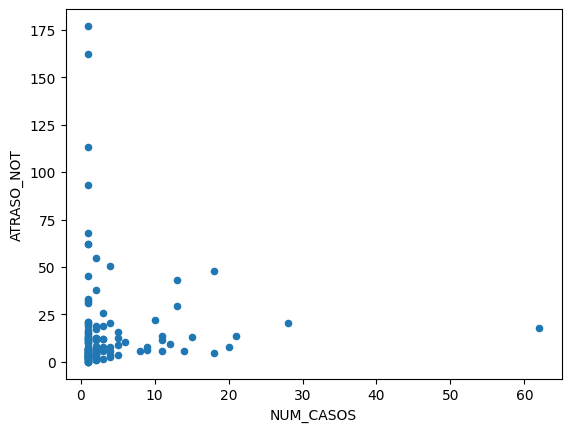

In [11]:
a2.questao_10(CAMINHO)

In [12]:
dicionario_estados = {
    12:"AC", 27:"AL", 16:"AP", 13:"AM", 29:"BA", 23:"CE", 53:"DF", 32:"ES",
    52:"GO", 21:"MA", 51:"MT", 50:"MS", 31:"MG", 15:"PA", 25:"PB", 41:"PR",
    26:"PE", 22:"PI", 24:"RN", 43:"RS", 33:"RJ", 11:"RO", 14:"RR", 42:"SC",
    35:"SP", 28:"SE", 17:"TO"
}

In [13]:
df = pd.read_csv(CAMINHO)

In [14]:
df["SG_UF_NOT"] = df["SG_UF_NOT"].replace(dicionario_estados)
df = df.astype({"DT_NOTIFIC": str, "DT_SIN_PRI": str})
df["DT_NOTIFICACAO"] = pd.to_datetime(df["DT_NOTIFIC"])
df["DT_SINTOMAS"] = pd.to_datetime(df["DT_SIN_PRI"])
df["ATRASO_NOT"] = (df["DT_NOTIFICACAO"] - df["DT_SINTOMAS"]).dt.days

/tmp/ipykernel_34805/196557841.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["DT_NOTIFICACAO"] = pd.to_datetime(df["DT_NOTIFIC"])
/tmp/ipykernel_34805/196557841.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["DT_SINTOMAS"] = pd.to_datetime(df["DT_SIN_PRI"])
/tmp/ipykernel_34805/196557841.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

In [15]:
df[df["SG_UF_NOT"] == "AL"]

,Unnamed: 0,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,...,EVOR1_DT_R,CLASSI_FIN,CRITERIO,CON_DESCAR,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_NOTIFICACAO,DT_SINTOMAS,ATRASO_NOT
58,58,2,A809,20150223,201508,2015,AL,270510,1534,2722100,...,,4,1,G72.3,2,,20150420,2015-02-23,2015-02-20,3
116,116,2,A809,20150418,201515,2015,AL,270430,1533,2006510,...,,4,1,G72.3,2,,20150526,2015-04-18,2015-04-11,7
152,152,2,A809,20150519,201520,2015,AL,270430,1533,2006510,...,,4,1,G72.9,2,,20150617,2015-05-19,2015-05-12,7
153,153,2,A809,20150520,201520,2015,AL,270430,1533,2006510,...,,4,1,G72.9,2,,20150624,2015-05-20,2015-05-13,7
154,154,2,A809,20150520,201520,2015,AL,270430,1533,2006510,...,,4,1,G72.9,2,,20150615,2015-05-20,2015-05-09,11
171,171,2,A809,20150605,201522,2015,AL,270430,1533,2006510,...,,4,1,G72.9,2,,20150709,2015-06-05,2015-05-20,16
172,172,2,A809,20150605,201522,2015,AL,270430,1533,2006510,...,,4,1,G72.9,2,,20150709,2015-06-05,2015-05-22,14
178,178,2,A809,20150615,201524,2015,AL,270430,1533,2006510,...,,4,1,G72.9,2,,20150720,2015-06-15,2015-05-28,18
209,209,2,A809,20150707,201527,2015,AL,270430,1533,2006510,...,,4,1,G72.3,,,20150810,2015-07-07,2015-06-19,18
313,313,2,A809,20150914,201537,2015,AL,270430,1533,2006510,...,,4,1,G72.9,2,,20151014,2015-09-14,2015-09-12,2
